In [3]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

In [4]:
df = pd.read_csv('../../data/final_features_df.csv')
df = df.fillna(0)

y = df['Rating_bin']
X = df.drop(columns=['Unnamed: 0', 'Rating_bin', 'Gender_F'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.85)

In [5]:
clf = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=10**3)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs')

In [6]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4635
           1       0.55      0.03      0.06       783

    accuracy                           0.86      5418
   macro avg       0.70      0.51      0.49      5418
weighted avg       0.81      0.86      0.80      5418



array([[4616,   19],
       [ 760,   23]])

In [7]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.758115895905577

# Local Approximation

In [9]:
# this takes ~30min to run. think twice before running!
explainer = shap.explainers.Permutation(clf.predict, X_test, max_evals = 650)
shap_values = explainer(X_test)

Permutation explainer: 5419it [32:11,  2.79it/s]                            


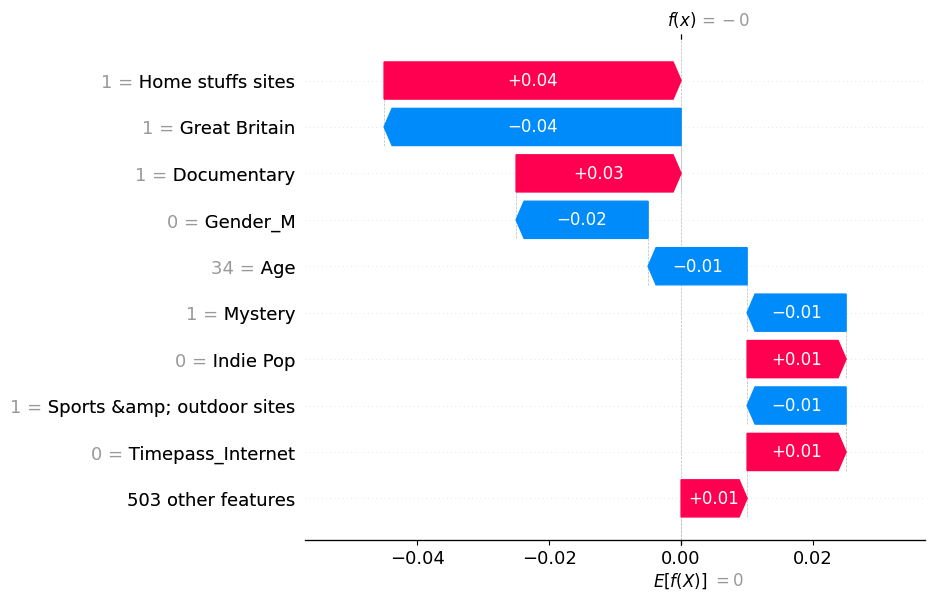

In [10]:
shap.plots.waterfall(shap_values[1])

# Global approximation

Computing partial dependence plots...


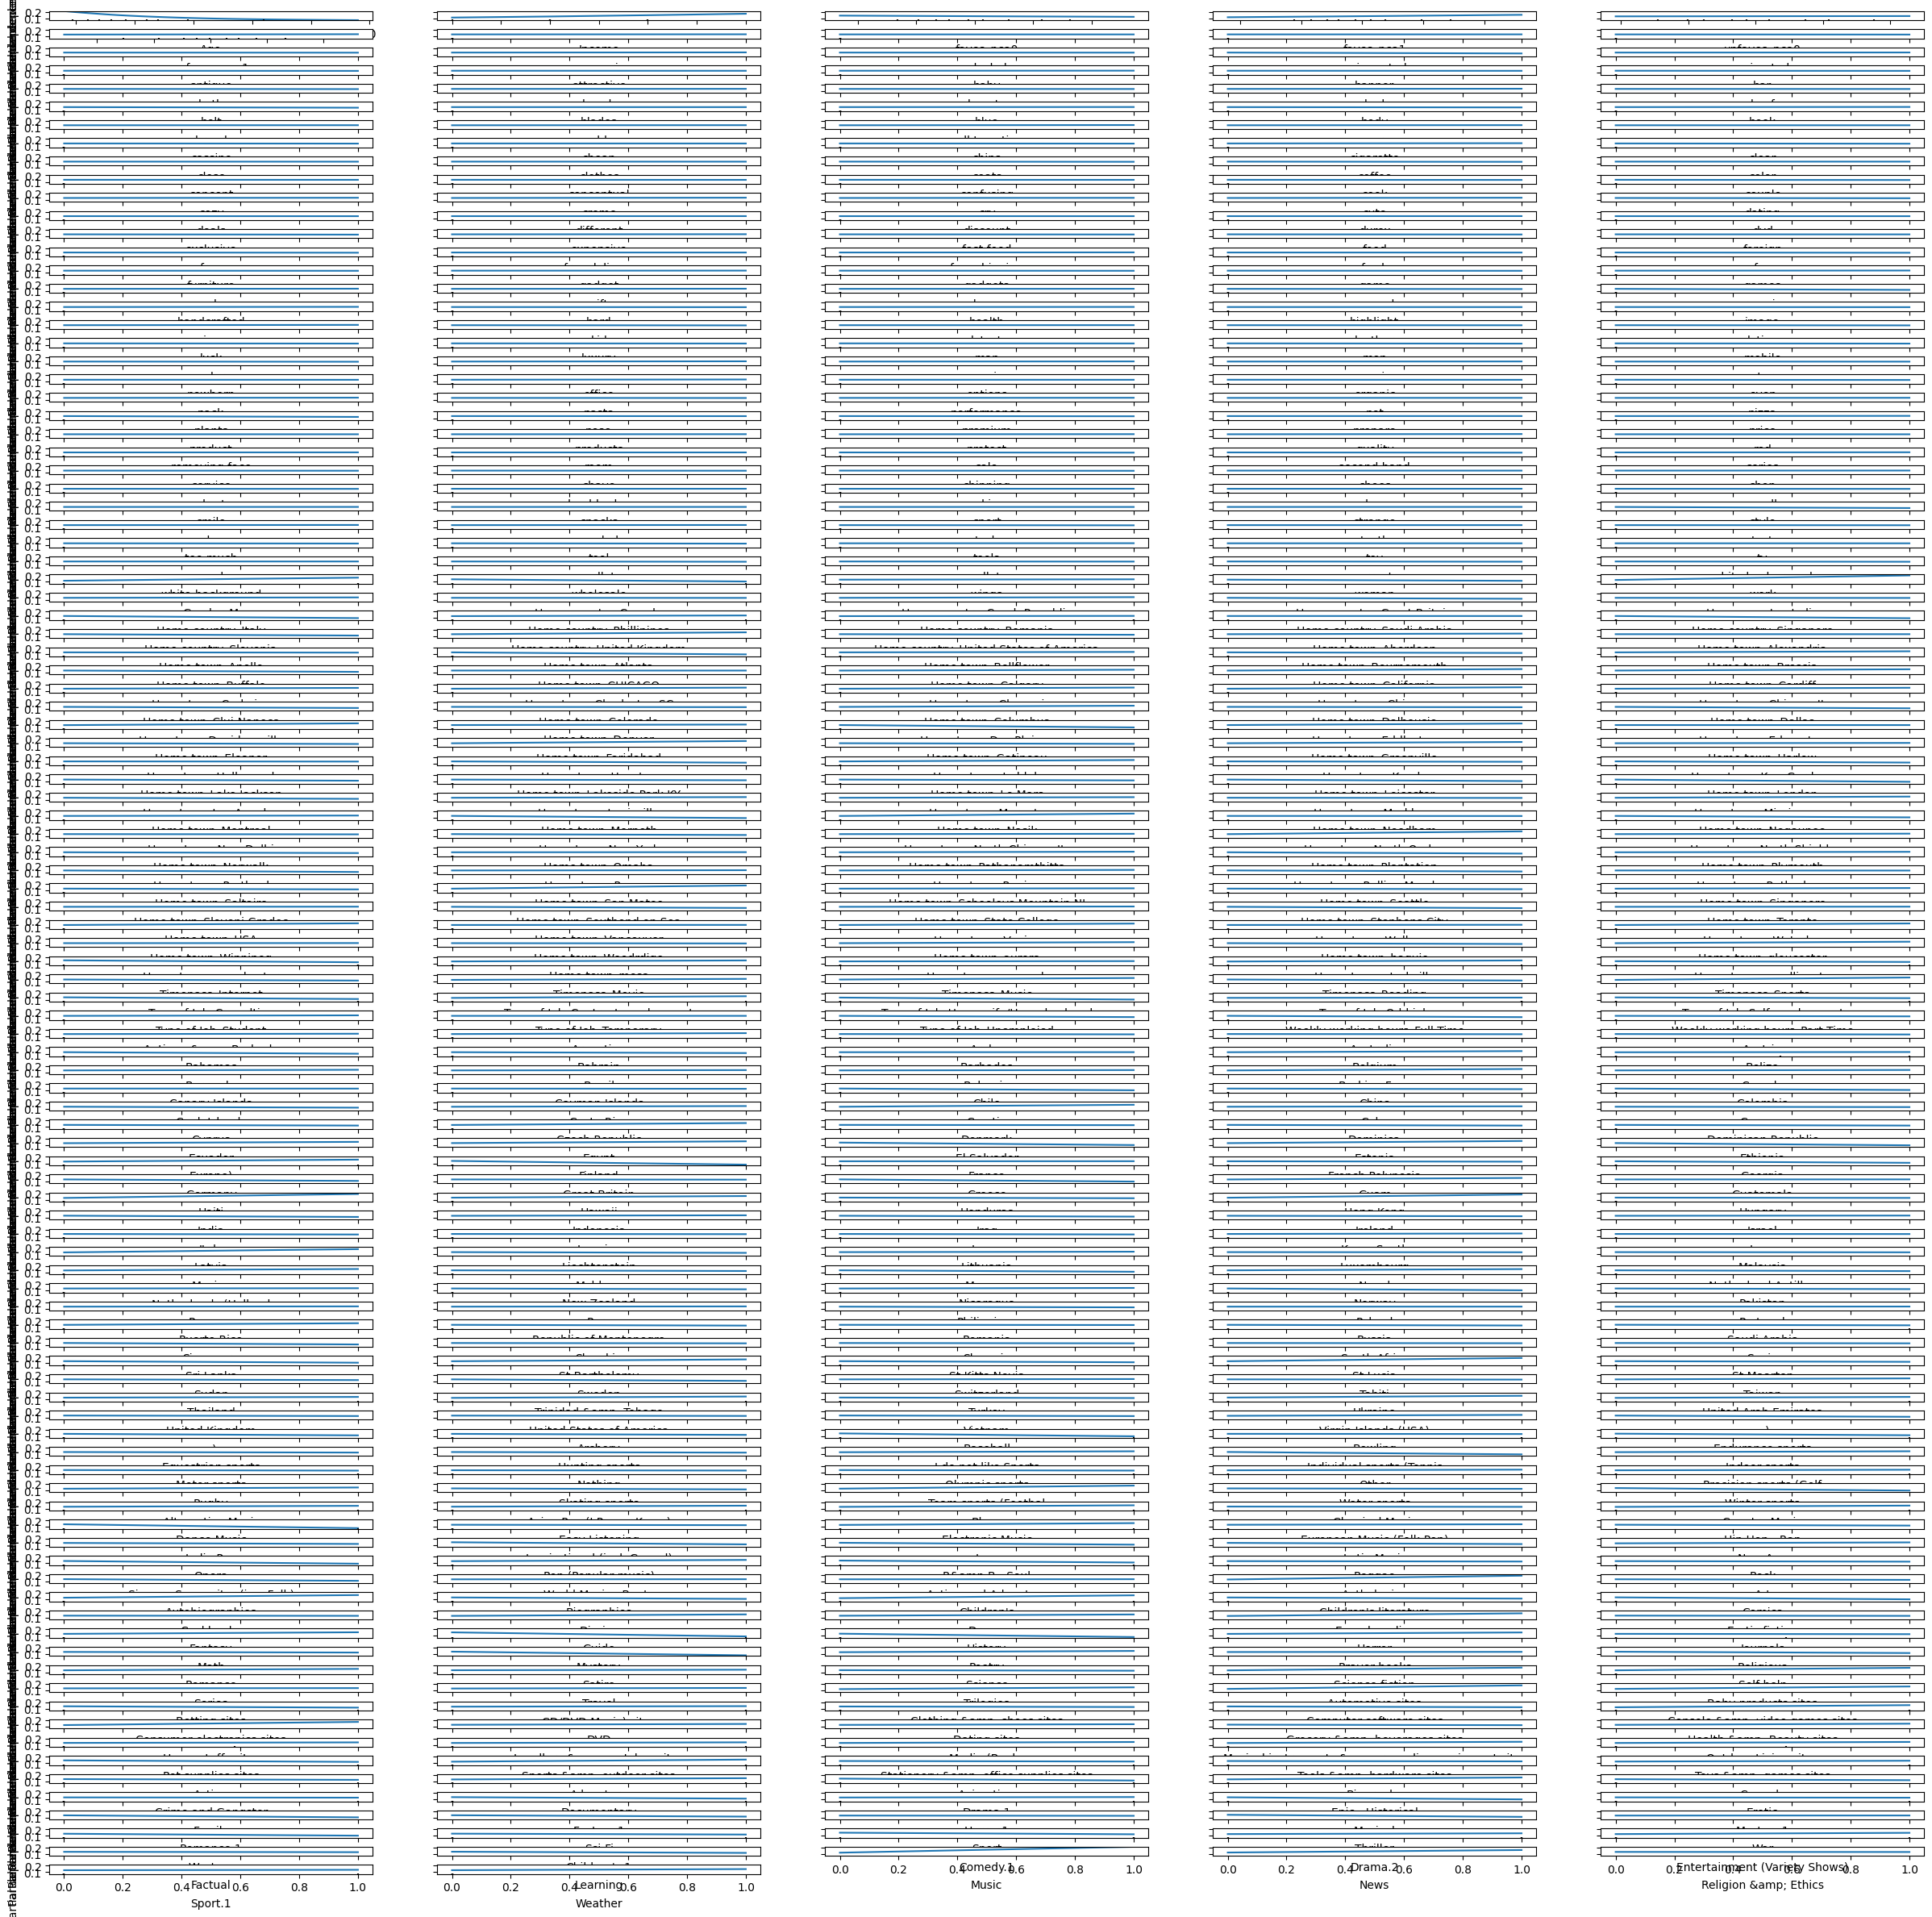

In [23]:
print('Computing partial dependence plots...')
PartialDependenceDisplay.from_estimator(clf, X, X,
                        n_jobs=3, grid_resolution=1000, n_cols = 5)
fig = plt.gcf()
fig.set_size_inches(30, 30, forward=True)
fig.subplots_adjust(hspace=1)